In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("/content/TSLA.csv")

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
df.drop(columns=['Adj Close'], inplace=True)

In [ ]:
adf_test = adfuller(df['Close'])
if adf_test[1] > 0.05:
    df['Close_diff'] = df['Close'].diff()
    df.dropna(inplace=True)


In [ ]:
df['Lag_1'] = df['Close'].shift(1)
df['Lag_2'] = df['Close'].shift(2)
df['Lag_3'] = df['Close'].shift(3)


In [ ]:
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_10'] = df['Close'].rolling(window=10).mean()

In [ ]:
df.dropna(inplace=True)

In [ ]:
X = df[['Lag_1', 'Lag_2', 'MA_5']]
y = df['Close']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Mean Absolute Error: 6.25
Root Mean Squared Error: 8.61
R-squared Score: 0.98


In [ ]:
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)

print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")

Train R² Score: 0.9979
Test R² Score: 0.9779


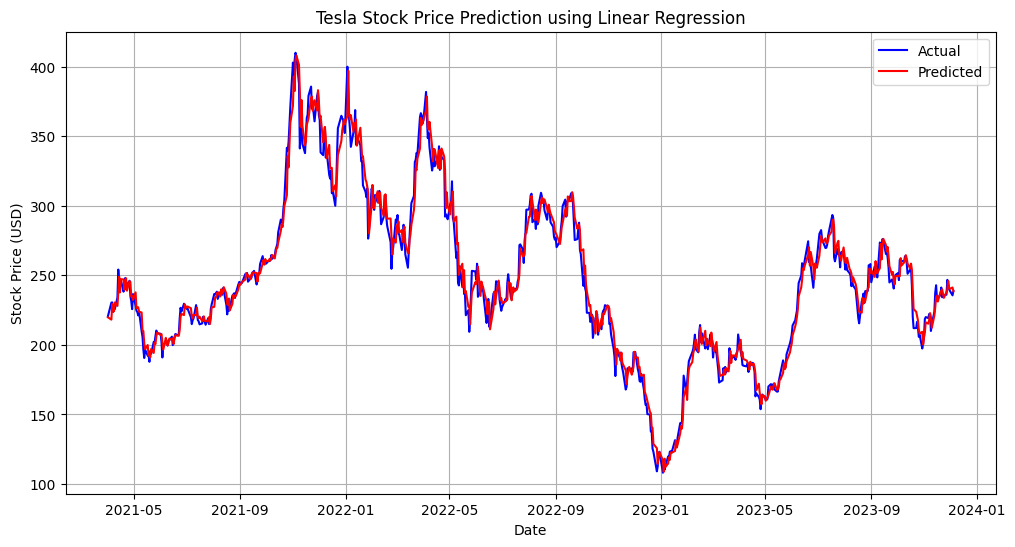

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.title('Tesla Stock Price Prediction using Linear Regression')
plt.legend()
plt.grid()
plt.show()

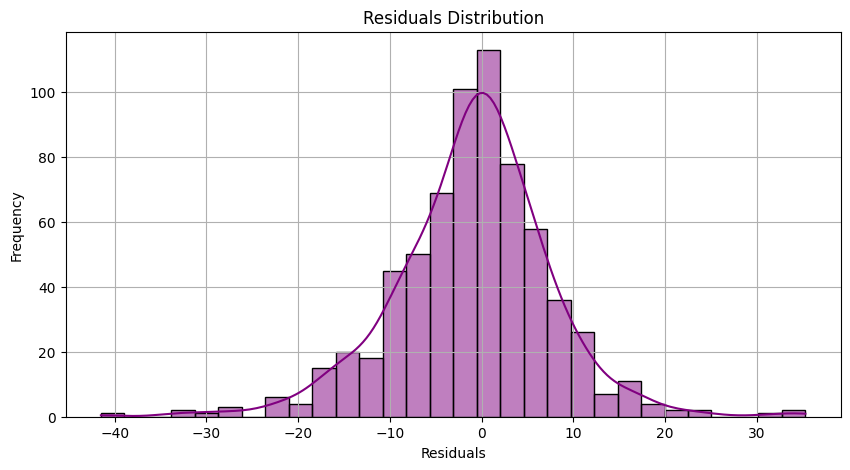

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.grid()
plt.show()

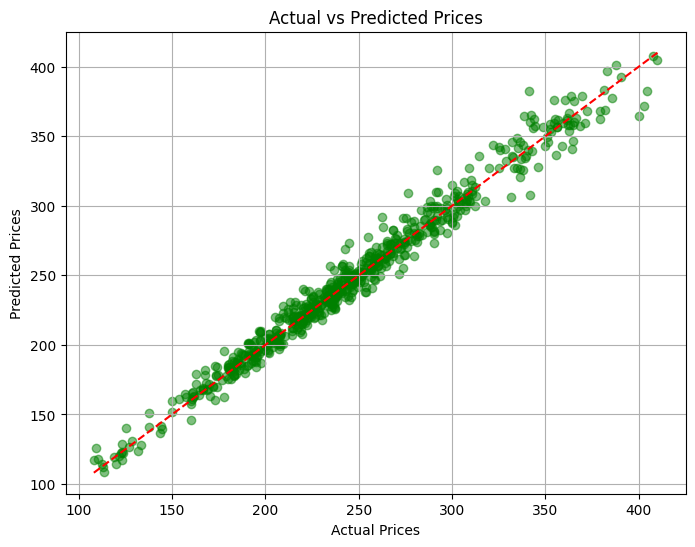

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.grid()
plt.show()

In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=200)
lasso_model.fit(X_train, y_train)

lasso_y_pred = lasso_model.predict(X_test)

lasso_test_r2 = lasso_model.score(X_test, y_test)

print(f"Lasso Test R² Score: {lasso_test_r2:.4f}")

Lasso Test R² Score: 0.8484


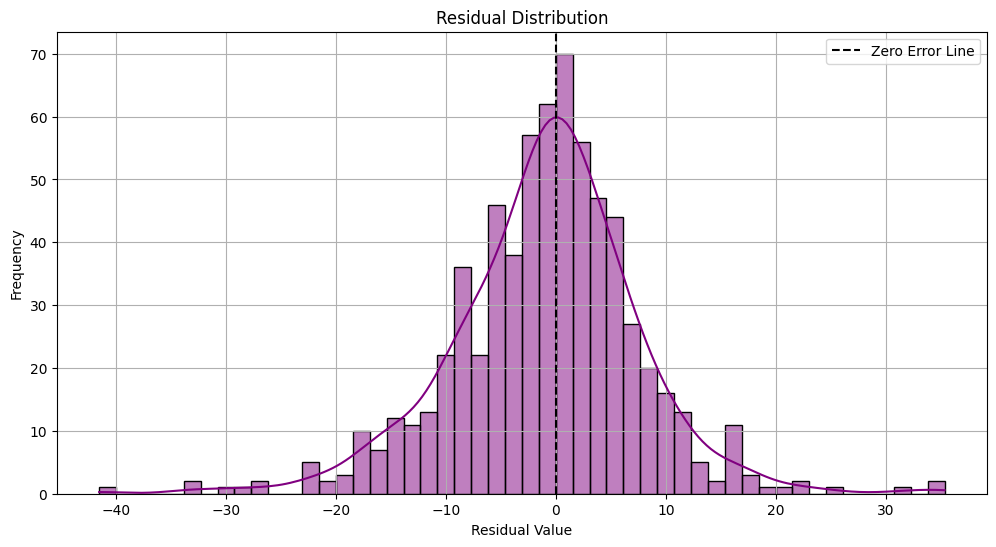

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute Residuals
residuals = y_test - y_pred

# Plot Residuals
plt.figure(figsize=(12, 6))
sns.histplot(residuals, bins=50, kde=True, color='purple')
plt.axvline(x=0, color='black', linestyle='--', label="Zero Error Line")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.legend()
plt.grid()
plt.show()
